# Imports

In [1]:
from pathlib import Path

import keras

from matplotlib import pyplot as plt


2023-11-17 11:01:03.690721: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 11:01:06.626830: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 11:01:06.638043: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 11:01:17.232403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## In colab

In [ ]:
from google.colab import userdata

In [ ]:
kaggle_target_path = Path('/root/.kaggle/kaggle.json')
kaggle_target_path.parent.mkdir(exist_ok=True, parents=True)
with open(kaggle_target_path,'w') as f:
  f.write(userdata.get('Kaggle'))

In [ ]:
! kaggle datasets download -d marquis03/fruits-100

In [ ]:
! unzip fruits-100.zip -d fruits-100

In [ ]:
! rm -r fruits-100.zip

In [ ]:
data_root_path = Path('fruits-100')
model_path = Path('haha.keras')

## In pc

In [2]:
import yaml

In [3]:
with open('local_paths.yaml') as f:
    local_paths = yaml.safe_load(f)

In [32]:
data_root_path = Path(local_paths['data_root_path'])
model_path = Path(local_paths['model_path'])

## Loading train and validation data

In [16]:
train_data_path = data_root_path / 'train'
val_data_path = data_root_path / 'val'
test_data_path = data_root_path / 'test'
class_names_path = data_root_path / 'classname.txt'

In [19]:
class_names = []
with open(class_names_path) as f:
    class_names = f.read().strip().split('\n')
    

In [27]:
train_data = keras.utils.image_dataset_from_directory(
    train_data_path, image_size=(150, 150), class_names=class_names, shuffle=False, batch_size=1)

val_data = keras.utils.image_dataset_from_directory(
    val_data_path, image_size=(150, 150), class_names=class_names, shuffle=False, batch_size=1)

test_data = keras.utils.image_dataset_from_directory(
    test_data_path, image_size=(150, 150), shuffle=False, batch_size=1)

Found 40000 files belonging to 100 classes.
Found 5000 files belonging to 100 classes.
Found 5000 files belonging to 100 classes.


In [12]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

88


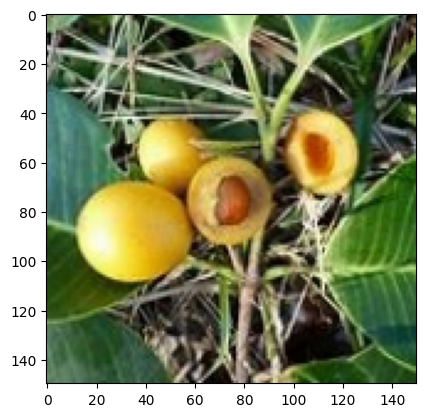

In [28]:
train_data_iterator = train_data.as_numpy_iterator()
k1 = next(train_data_iterator)

print(k1[1][0])
plt.imshow(k1[0][0].astype('uint8'))
plt.show()

In [33]:
model = keras.models.load_model(model_path)

ValueError: Cannot assign value to variable ' conv_dw_1_bn/gamma:0': Shape mismatch.The variable shape (32,), and the assigned value shape (64,) are incompatible.